In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [16]:
iris = datasets.load_iris()
print(iris['feature_names'])
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print(x)
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
print(y)
iris_data = pd.concat([x,y], axis=1)
iris_data[1:100:5]

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
5                  5.4               3.9                1.7               0.4
6                  4.6               3.4                1.4               0.3
7                  5.0               3.4                1.5               0.2
8                  4.4               2.9                1.4               0.2
9                  4.9               3.1                1.5               0.1
10                 5.4               3.7                1.5

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
1,4.9,3.0,1.4,0.2,0
6,4.6,3.4,1.4,0.3,0
11,4.8,3.4,1.6,0.2,0
16,5.4,3.9,1.3,0.4,0
21,5.1,3.7,1.5,0.4,0
26,5.0,3.4,1.6,0.4,0
31,5.4,3.4,1.5,0.4,0
36,5.5,3.5,1.3,0.2,0
41,4.5,2.3,1.3,0.3,0
46,5.1,3.8,1.6,0.2,0


In [17]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [18]:
target_name = {
    0:'setosa',
    1:'versicolor',
    2:'virginica'
}

In [19]:
iris_data['target_name'] = iris_data['target'].map(target_name)
iris_data = iris_data[(iris_data['target_name'] == 'setosa')|(iris_data['target_name'] == 'versicolor')]
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target_name']]

iris_data.head(5)

,sepal length (cm),petal length (cm),target_name
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa


In [20]:
target_class = {
    'setosa':1,
    'versicolor':-1
}

In [21]:
iris_data['target_class'] = iris_data['target_name'].map(target_class)

In [22]:
del iris_data['target_name']

In [25]:
iris_data[1:100:5]

,sepal length (cm),petal length (cm),target_class
1,4.9,1.4,1
6,4.6,1.4,1
11,4.8,1.6,1
16,5.4,1.3,1
21,5.1,1.5,1
26,5.0,1.6,1
31,5.4,1.5,1
36,5.5,1.3,1
41,4.5,1.3,1
46,5.1,1.6,1


In [26]:
def sign(z):
    if z > 0:
        return 1
    else:
        return -1

iterator: 0
x: [1.  5.1 1.4]
w: [1.  5.1 1.4]


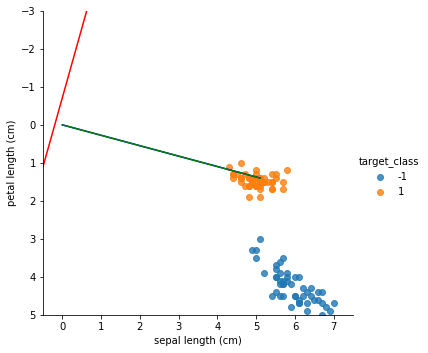

iterator: 1
x: [1.  7.  4.7]
w: [ 0.  -1.9 -3.3]


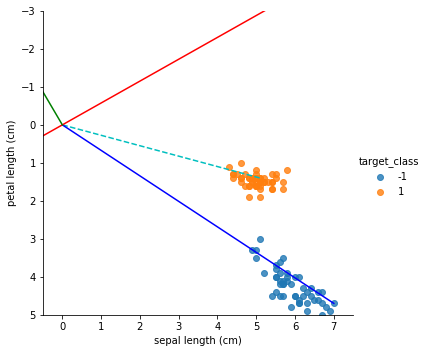

iterator: 2
x: [1.  5.1 1.4]
w: [ 1.   3.2 -1.9]


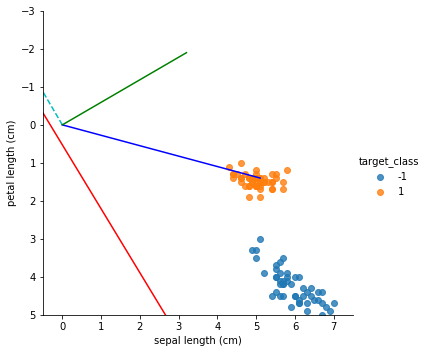

iterator: 3
x: [1.  7.  4.7]
w: [ 0.  -3.8 -6.6]


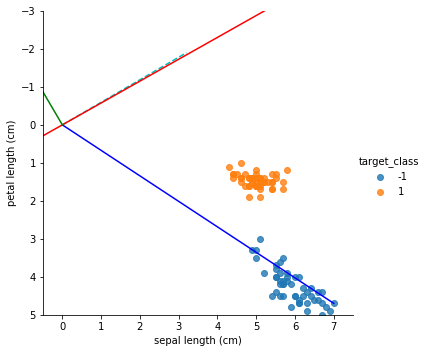

iterator: 4
x: [1.  5.1 1.4]
w: [ 1.   1.3 -5.2]


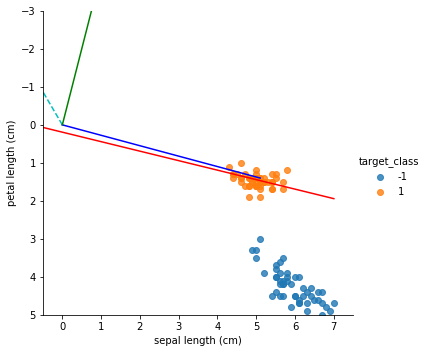

iterator: 5
x: [1.  4.6 1.5]
w: [ 2.   5.9 -3.7]


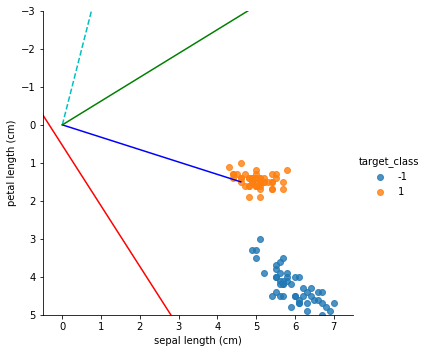

iterator: 6
x: [1.  7.  4.7]
w: [ 1.  -1.1 -8.4]


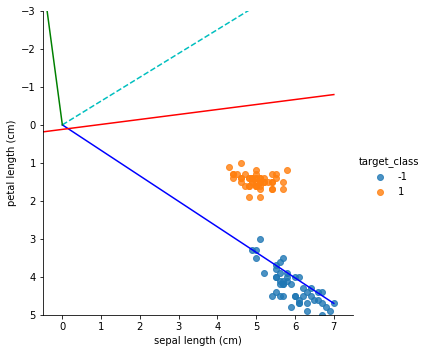

iterator: 7
x: [1.  5.1 1.4]
w: [ 2.  4. -7.]


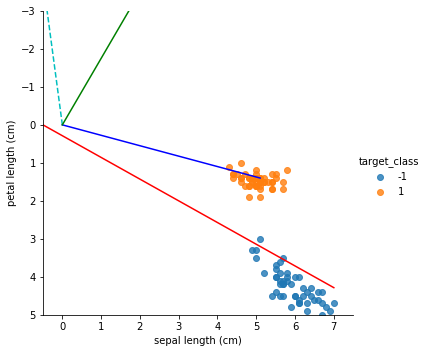

iterator: 8
x: [1.  5.7 3.5]
w: [  1.   -1.7 -10.5]


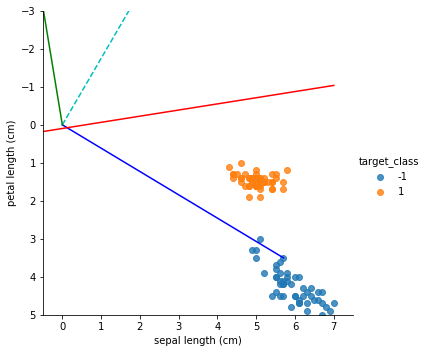

iterator: 9
x: [1.  5.1 1.4]
w: [ 2.   3.4 -9.1]


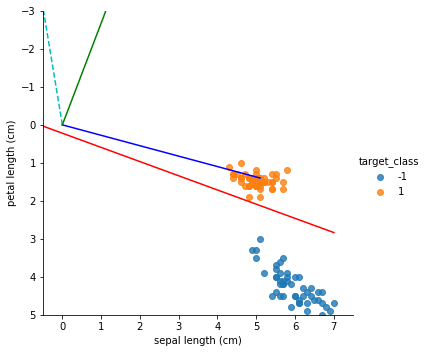

In [27]:
w = np.array([0.,0.,0.])
error = 1
iterator = 0
while error != 0:
    error = 0
    for i in range(len(iris_data)):
        x,y = np.concatenate((np.array([1.]), np.array(iris_data.iloc[i])[:2])), np.array(iris_data.iloc[i])[2]
        if sign(np.dot(w,x)) != y:
            print("iterator: "+str(iterator))
            iterator += 1
            error += 1
            sns.lmplot('sepal length (cm)','petal length (cm)',data=iris_data, fit_reg=False, hue ='target_class')
            
            # 前一個Decision boundary 的法向量
            if w[1] != 0:
                x_last_decision_boundary = np.linspace(0,w[1])
                y_last_decision_boundary = (w[2]/w[1])*x_last_decision_boundary
                plt.plot(x_last_decision_boundary, y_last_decision_boundary,'c--')
            w += y*x            
            print("x: " + str(x))            
            print("w: " + str(w))
            # x向量 
            x_vector = np.linspace(0,x[1])
            y_vector = (x[2]/x[1])*x_vector
            plt.plot(x_vector, y_vector,'b')
            # Decision boundary 的方向向量
            x_decision_boundary = np.linspace(-0.5,7)
            y_decision_boundary = (-w[1]/w[2])*x_decision_boundary - (w[0]/w[2])
            plt.plot(x_decision_boundary, y_decision_boundary,'r')
            # Decision boundary 的法向量
            x_decision_boundary_normal_vector = np.linspace(0,w[1])
            y_decision_boundary_normal_vector = (w[2]/w[1])*x_decision_boundary_normal_vector
            plt.plot(x_decision_boundary_normal_vector, y_decision_boundary_normal_vector,'g')
            plt.xlim(-0.5,7.5)
            plt.ylim(5,-3)
            plt.show()